In [41]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import exp, heaviside, pi, log as ln
from scipy.special import gamma, factorial as fac
th = lambda x : heaviside(x, 1/2)

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [88]:
r0 = -.4
u0 = 1

n = 100
rho_max = 2.
rho = np.linspace(0, rho_max, n, dtype=np.longdouble)
dr = rho[1] - rho[0]
U0 = r0 * rho / fac(1) + u0 * rho**2 / fac(2)

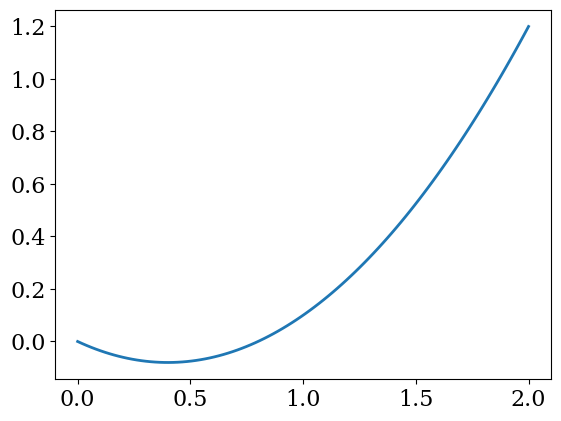

In [90]:
plt.plot(rho, U0)

In [181]:
def D2(U, dx):
    DU = np.zeros_like(U)
    DU[+2:-2] = +(-1/12*U[4:] + 2/3*U[3:-1] - 2/3*U[1:-3] + 1/12*U[:-4]) / dx
    DU[+0:+2] = +(-1/4*U[+4:+6] + 4/3*U[+3:+5] - 3*U[+2:+4] + 4*U[+1:+3] - 25/12*U[+0:+2]) / dx
    DU[-2:  ] = -(-1/4*U[-6:-4] + 4/3*U[-5:-3] - 3*U[-4:-2] + 4*U[-3:-1] - 25/12*U[-2:  ]) / dx
    return DU

def DD2(U, dx):
    DDU = np.zeros_like(U)
    DDU[+2:-2] = (-1/12*(U[4:]+U[:-4]) + 4/3*(U[3:-1]+U[1:-3]) -5/2* U[2:-2]) / (dx)**2 
    DDU[+0:+2] = (-5/6*U[+5:+7] + 61/12*U[+4:+6] - 13*U[+3:+5] + 107/6*U[+2:+4] - 77/6*U[+1:+3] + 15/4*U[+0:+2]) / dx**2
    DDU[-2:  ] = (-5/6*U[-7:-5] + 61/12*U[-6:-4] - 13*U[-5:-3] + 107/6*U[-4:-2] - 77/6*U[-3:-1] + 15/4*U[-2:  ]) / dx**2
    return DDU

In [182]:
def D(U, dx):
    DU = np.zeros_like(U)
    DU[1:-1] = 1/2*(U[2:] - U[:-2]) / dx
    DU[+0] = +(-1/2 * U[+2] + 2 * U[+1] - 3/2*U[+0]) / dx
    DU[-1] = -(-1/2 * U[-3] + 2 * U[-2] - 3/2*U[-1]) / dx
    return DU

def DD(U, dx):
    DDU = np.zeros_like(U)
    DDU[1:-1] = (U[2:] + U[:-2] - 2 * U[1:-1]) / (dx)**2 
    DDU[+0] = +(-U[+3] + 4*U[+2] - 5*U[+1] + 2*U[+0]) / dx**2
    DDU[-1] = +(-U[-4] + 4*U[-3] - 5*U[-2] + 2*U[-1]) / dx**2
    return DDU

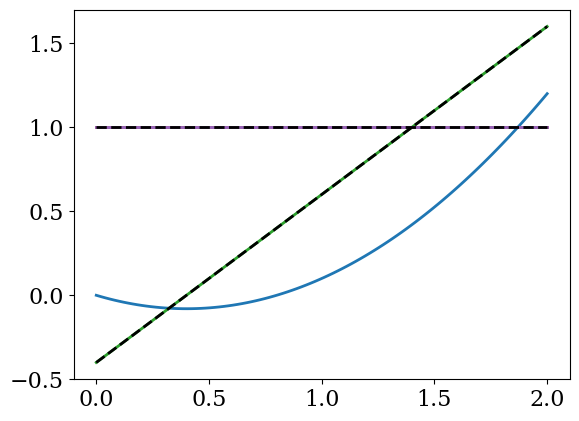

In [183]:
fig, ax = plt.subplots()

plt.plot(rho, U0, dr)
plt.plot(rho, D(U0, dr))
plt.plot(rho, D(D(U0, dr), dr))
plt.plot(rho, DD(U0,dr))

plt.plot(rho, D2(U0, dr), 'k--')
plt.plot(rho, DD2(U0,dr), 'k--')

# ax.set_ylim(-1,2)

In [187]:
K = lambda d :  2/(4*pi)**(d/2)/gamma(2/d)
l = lambda w, d : - K(d) * 2 / (1 + w) 

def F(U, rho, dr, d=3):
    DU = D2(U, dr)
    DDU = DD2(U, dr)
    return -d * U + (d-2) * rho * DU + l(DU + 2*rho*DDU, d)

In [189]:
n = 1000
rho_max = 0.1
rho = np.linspace(0, rho_max, n)
dr = rho[1] - rho[0]
U0 = r0 * rho / fac(1) + u0 * rho**2 / fac(2)

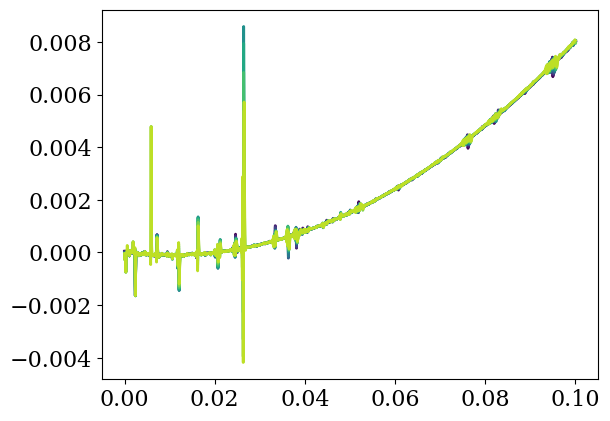

In [194]:
dt = 0.0000001
N = 10
M = 10_000
d = 3

r0 = -.02
u0 = 2
U0 = r0 * rho / fac(1) + u0 * rho**2 / fac(2)
U = U0

fig, ax = plt.subplots()

for i in range(N):
    for j in range(M):
        U = U - F(U, rho, dr, d=d) * dt
    ax.plot(rho, U, color=cm.viridis(i/N))

# ax.set_ylim(-3, 5)